
# <span style="color:rgb(213,80,0)">Examnen primer parcial Robótica</span>

Barajas Gaete Rodrigo Ainar

#### Introducción

   La robótica es una disciplina del área de la mecatrónica que combina diferentes conocimientos, ya sean de tipo electrónico, mecánico o computacional, con el fin de desarrollar sistemas mecatrónicos que sean capaces de realizar tareas autónomas o asistidas. Hoy en día, la robótica está presente en la mayoría de los sectores industriales, especialmente en el ámbito de producción, así como también es posible encontrarla en actividades cotidianas. Por estas y más razones, la robótica se ha vuelto indiscutiblemente un foco de interés para la investigación y el avance tecnológico.Uno de los principales efectos del gran interés por el tema es la generación y búsqueda de conocimiento (modelos, propuestas, diseños, etc.). Por ello, es necesario que, como futuros profesionistas, aprendamos a realizar un correcto análisis y comprensión de la rama teórica del tópico.


Para este examen se buscara analizar y comprender el modelo propuesto, un robot tipo SCARA *(Selective Compliance Articulated Robot Arm* ) *.* Estos robots se caracterizan por sus rápidos ciclos de trabajo, excelente repetitividad, gran capacidad de carga y su amplio campo de aplicación.


Se obtendrán los modelos cinemáticos directos e inversos de: postura, velocidad y aceleración, a tráves del uso de conocimiento matemático y del software, con el objetivo de entender e interpretar el comportamiento del modelo propuesto. De igual forma se obtendrá el modelo dinámico directo e inverso, donde será necesario  obtener modelos como: Velocidades angulares, lineales, ecuacones de Lagrange, etc.


Definición de funciones


In [1]:
%Deficición de la función de manera simbolica
syms Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j)

%Definición de la transformación homógenea general
Tij(x_i_j,y_i_j,z_i_j,gi_j,bi_j,ai_j) = [cos(ai_j)*cos(bi_j) cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j) sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j) x_i_j; sin(ai_j)*cos(bi_j) cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j) sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j) y_i_j; -sin(bi_j) cos(bi_j)*sin(gi_j) cos(bi_j)*cos(gi_j) z_i_j; 0 0 0 1]


## Modelado del robot Scara

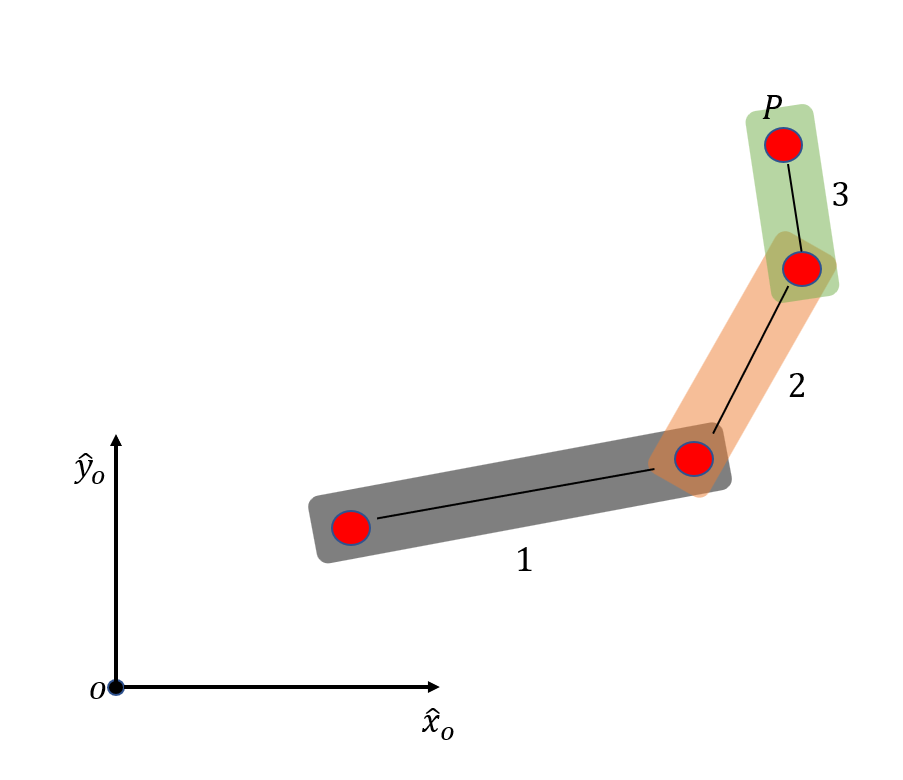

### Planteamiento del modelo cinemático de la posición

Partiendo de:


$$^0 T_P =^0 T_1 ^1 T_2 ^0 T_3 ^3 T_P =\left(\begin{array}{cc} ^0 R_P  & ^0 p_P \newline 0^T  & 1 \end{array}\right)$$

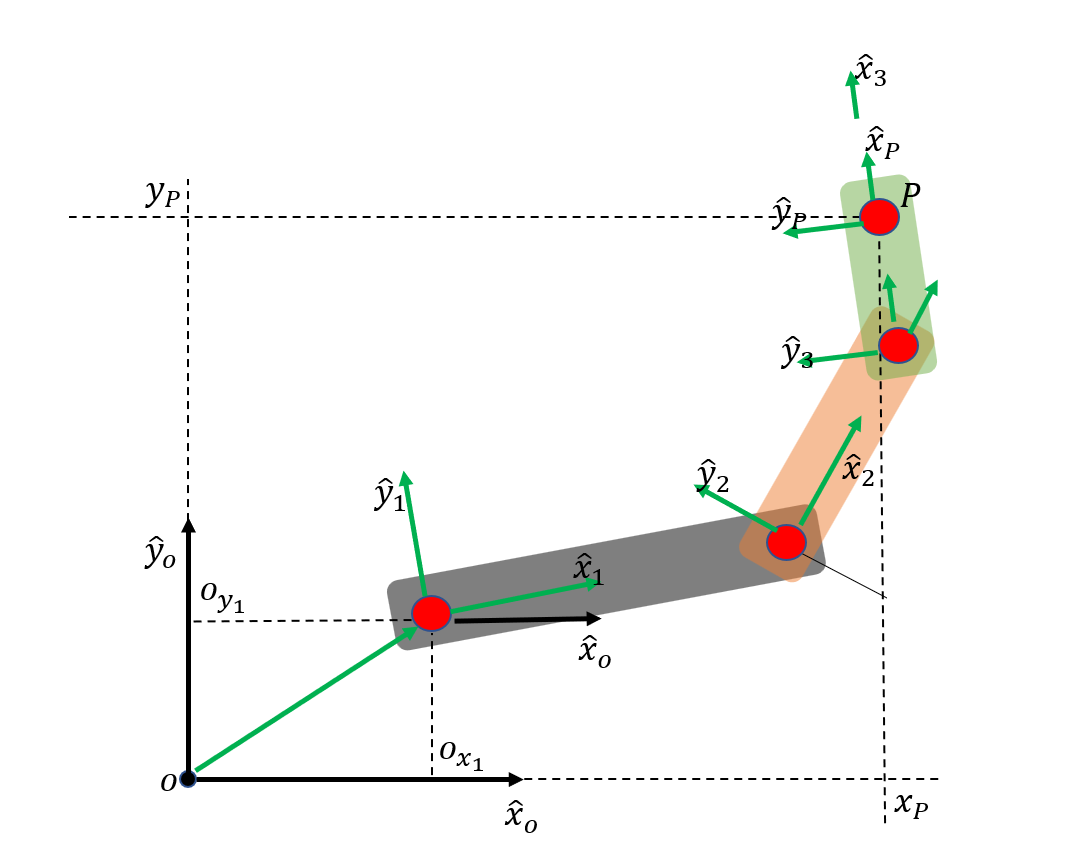


Donde

-  $^0 T_1$  :

In [2]:
syms x_O_1 y_O_1 theta_O_1 L_2 theta_1_2 L_3 theta_2_3 L_1

T_O_1 = Tij(x_O_1,y_O_1,0,0,0,theta_O_1)


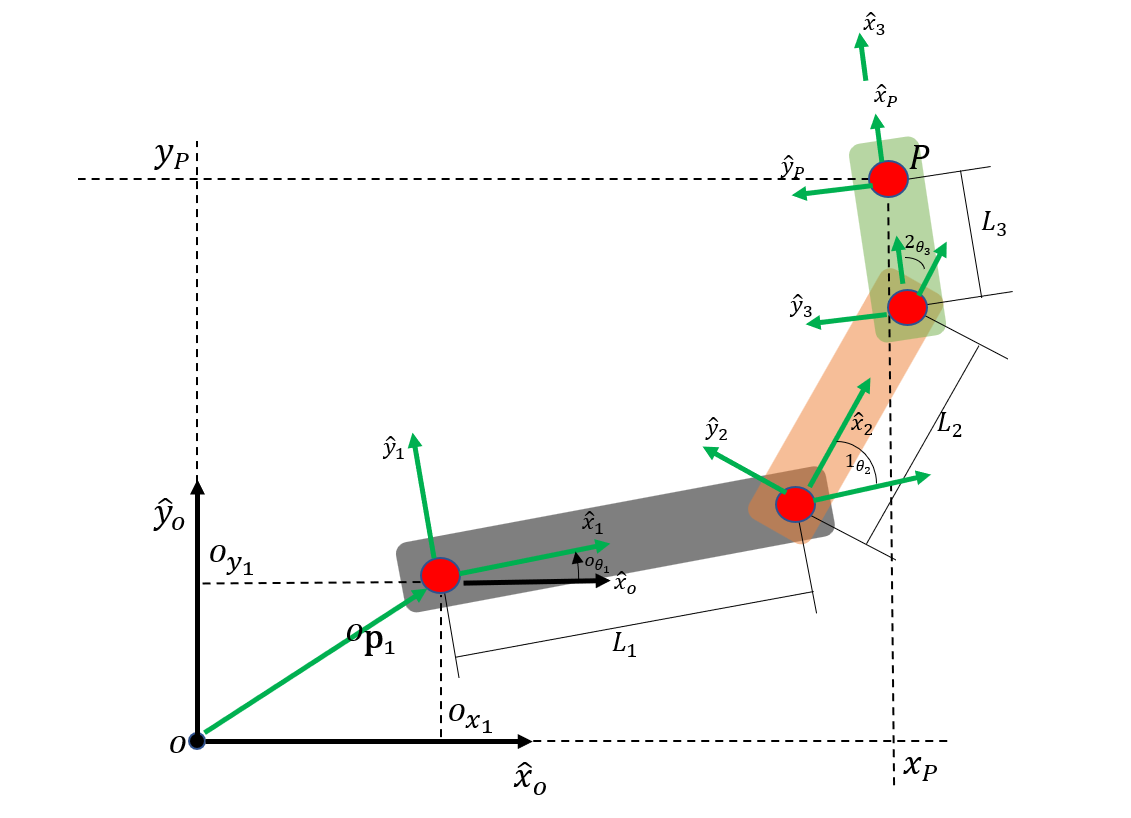


-  $^1 T_2$ :

In [3]:
T_1_2 = Tij(L_1,0,0,0,0,theta_1_2)


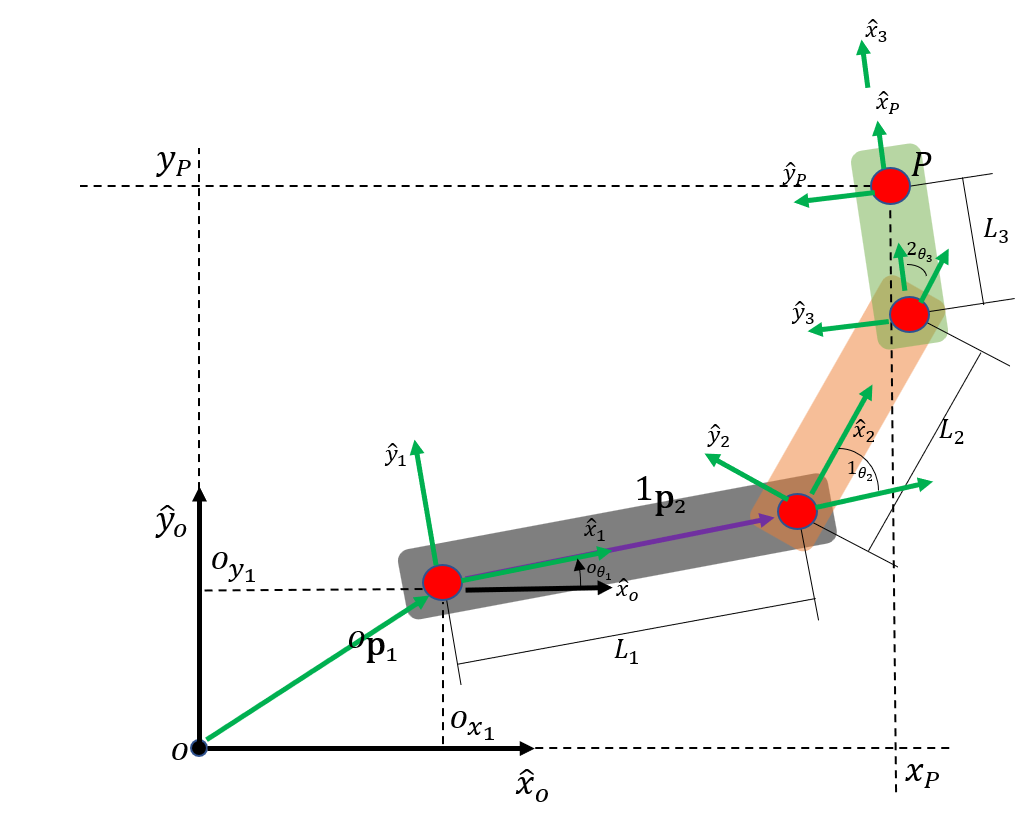


-  $^2 T_3$ :

In [4]:
T_2_3 = Tij(L_2,0,0,0,0,theta_2_3)


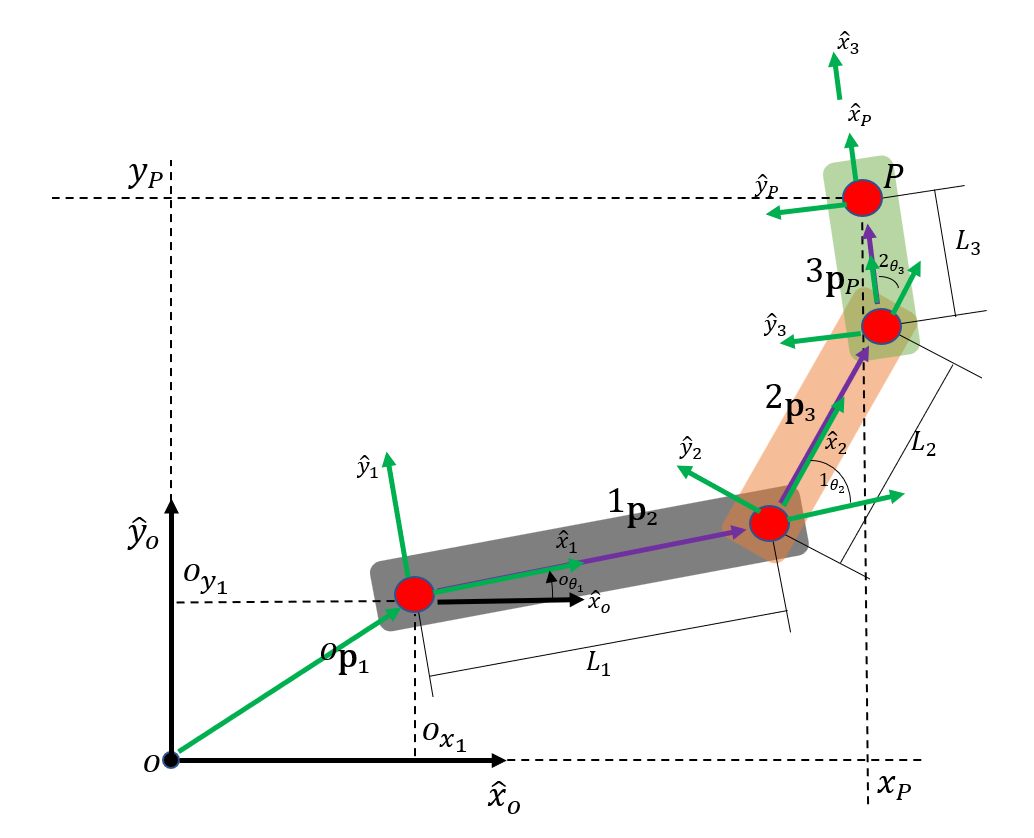


-  $^3 T_P$ :

In [5]:
T_3_P = Tij(L_3,0,0,0,0,0)


Por lo tanto nuestra matriz general es la siguiente:


In [6]:
T_O_P = simplify(T_O_1*T_1_2*T_2_3*T_3_P)


Para el modelo cinemático de postura proponemos:

###
$$F=^o \xi_p -^o \xi_p (q)=0\Longrightarrow ^o \xi_p =^o \xi_p (q)$$

Donde


$$^o \xi_p (q)=\left(\begin{array}{c} ^o p_P \newline ^o {{\theta }}_P  \end{array}\right)$$

Dado que obtivimos


In [7]:
xi_O_P = [T_O_P(1,4);T_O_P(2,4);theta_O_1+theta_1_2+theta_2_3]


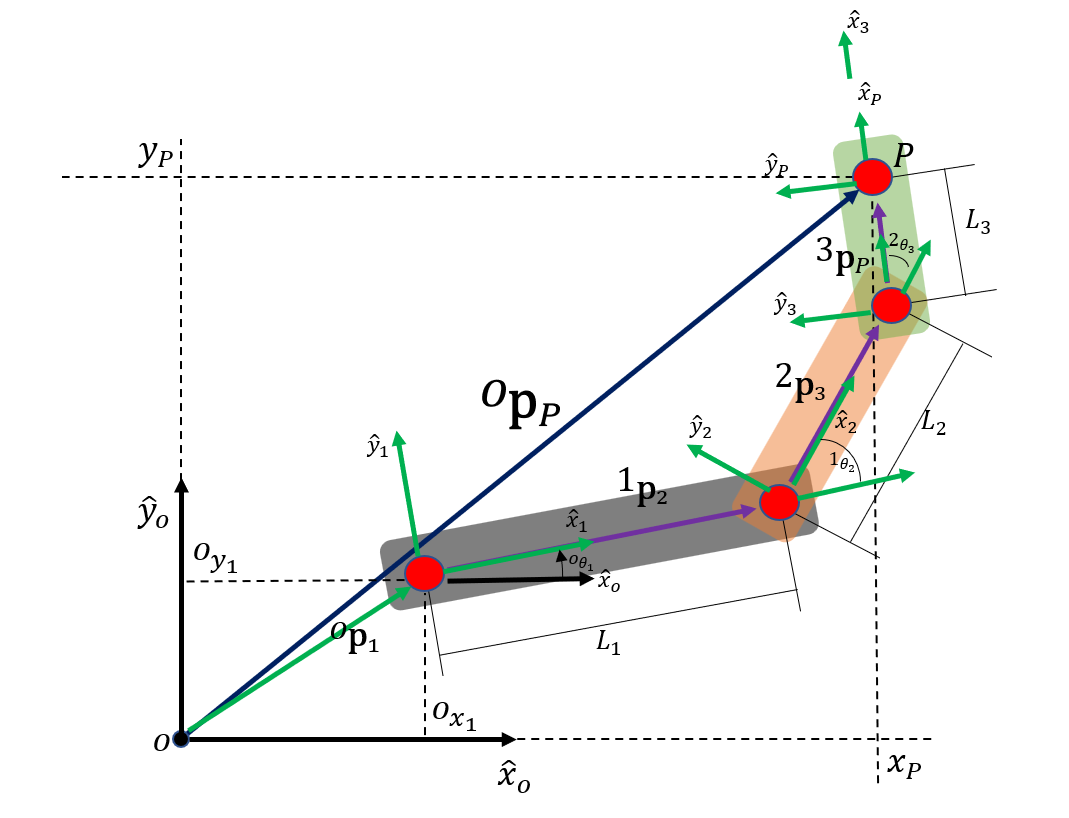


In [8]:
var = htrans(xi_O_P)

### Modelo inverso de postura

Dado que el modelo directo de postura no es una matriz cuadrada, para obtener su inversa se propone **pseudoinversa de Moore\-Penrose (por izquierda debido a que la matriz contiene más filas que columnas)**:


$$A^+ ={\left(A^T A\right)}^{-1} A^T$$

Calculando matriz traspuesta:


In [9]:
AT = transpose(xi_O_P);


Realizando: ${\left(A^T A\right)}^{-1}$


In [10]:
Atemporal = (AT*xi_O_P)^(-1);


Realizando: ${\left(A^T A\right)}^{-1} A^T$


In [11]:
inv_xi_O_P = Atemporal*transpose(xi_O_P)

### Modelo cinemático directo de las velocidades

Partiendo del modelo de postura:


$$^o \xi_p =^o \xi_p (q)$$

Aplicamos operador derivada total a ambos miembros del modelo:


$$\frac{d}{dt}^o \xi_p =\frac{d}{dt}^o \xi_p (q)$$

Desarrollando $\frac{d}{dt}^0 \xi_p (q)$ :


 $\frac{d}{dt}^o \xi_p (q)=\frac{\partial }{\partial ^o \theta_1 }^o \xi_p (q)^o {\dot{\theta} }_1 +\frac{\partial }{\partial ^1 \theta_2 }^o \xi_p (q)^1 {\dot{\theta} }_2 +\frac{\partial }{\partial ^2 \theta_3 }^o \xi_p (q)^2 {\dot{\theta} }_3$ ...


... = $\left(\frac{\partial }{\partial ~^o \theta_1 }^o \xi_P (q)~~\frac{\partial }{\partial ~^1 \theta_2 }^o \xi_P (q)~~\frac{\partial }{\partial ~^2 \theta_3 }^o \xi_P (q)\right)$ $\left(\begin{array}{c} ^o {\dot{\theta} }_1 \newline ^1 {\dot{\theta} }_2 \newline ^2 {\dot{\theta} }_3  \end{array}\right)$


De esta forma el modelo se puede representar de la siguiete forma:

\matlabheadingtwo{
$$^o {\dot{\xi} }_P =J_{\theta } (q)\dot{q}$$}

Donde $J_{\theta } (q)$ es la siguiente matriz:


In [12]:
syms J_theta

J_theta
J_theta = jacobian(xi_O_P,[theta_O_1, theta_1_2,theta_2_3])


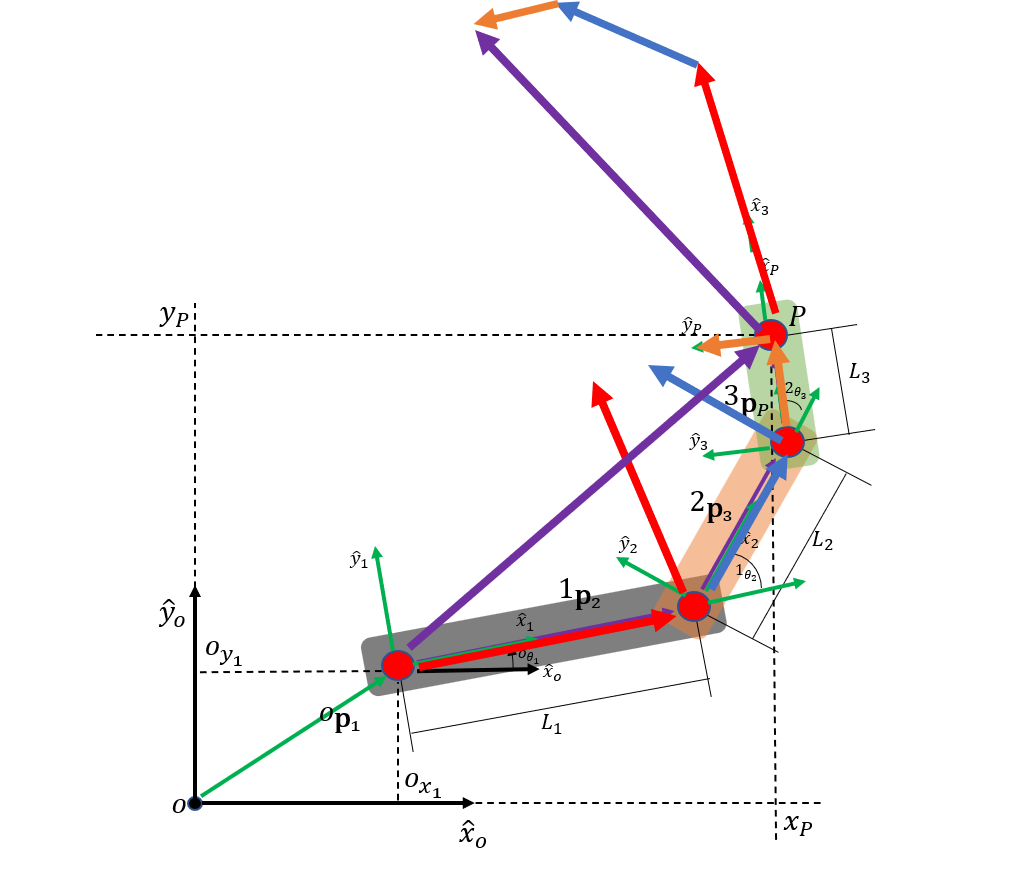

### Modelo cinemático inverso de las velocidades

Proponemos el siguiente modelo:

\matlabheadingtwo{
$$\dot{q} ={J_{\theta } }^{-1} (q)~^o {\dot{\xi} }_P$$}

Dado que la matriz Jacobiana es una matriz cuadrada el modelo se simplifica.


Donde ${J_{\theta } }^{-1} (q)$ es la siguiente matriz:


In [13]:
inv(J_theta)


Y donde $^0 {\dot{\xi} }_P$ es el siguiente vector:


$$\left(\begin{array}{c} ^o {\dot{x} }_P \newline ^o {\dot{y} }_P \newline ^o {\dot{\theta} }_P  \end{array}\right)$$
### Modelo cinemático de las aceleraciones

Partiendo del modelo cinemático de velocidades (directo) :


$$^o {\dot{\xi} }_P =J_{\theta } (q)\dot{q}$$

Aplicamos operador derivada total a ambos miembros del modelo:


$$\frac{d}{dt}^o {\dot{\xi} }_p =\frac{d}{dt}\left({J_{\theta } }(q)\dot{q} \right)$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Desarrollando $\frac{d}{dt}\left({J_{\theta } }(q)\dot{q} \right)$ :


 $\frac{d}{dt}\left({J_{\theta } }(q)\dot{q} \right)={\dot{J} }_{\theta } (q,\dot{q} )\dot{q} +J_{\theta } (q)\ddot{q}$ ...


Por lo tanto el modelo de aceleraciones directo es el siguiente:

\matlabheadingtwo{
$$^o {\ddot{\xi} }_P ={\dot{J} }_{\theta } (q,\dot{q} )\dot{q} +J_{\theta } (q)\ddot{q}$$}

Donde:

-      $\displaystyle \ddot{q} =\left(\begin{array}{c} ^0 {\ddot{\theta} }_1 \newline ^1 {\ddot{\theta} }_2 \newline ^2 {\ddot{\theta} }_3  \end{array}\right)$
-  $\displaystyle {\dot{J} }_{\theta } (q,\dot{q} )=H_{\theta } (q,\dot{q} )$

   Desarrollando  $H_{\theta } (q,\dot{q} )$ :


In [14]:
syms theta_O_1 theta_1_2 theta_2_3

H_l_1 = hessian(xi_O_P(1,:),[theta_O_1, theta_1_2, theta_2_3])
H_l_2 = hessian(xi_O_P(2,:),[theta_O_1, theta_1_2, theta_2_3])
H_l_3 = hessian(xi_O_P(3,:),[theta_O_1, theta_1_2, theta_2_3])
H_theta = [H_l_1(1,:);H_l_2(1,:);H_l_3(1,:)]


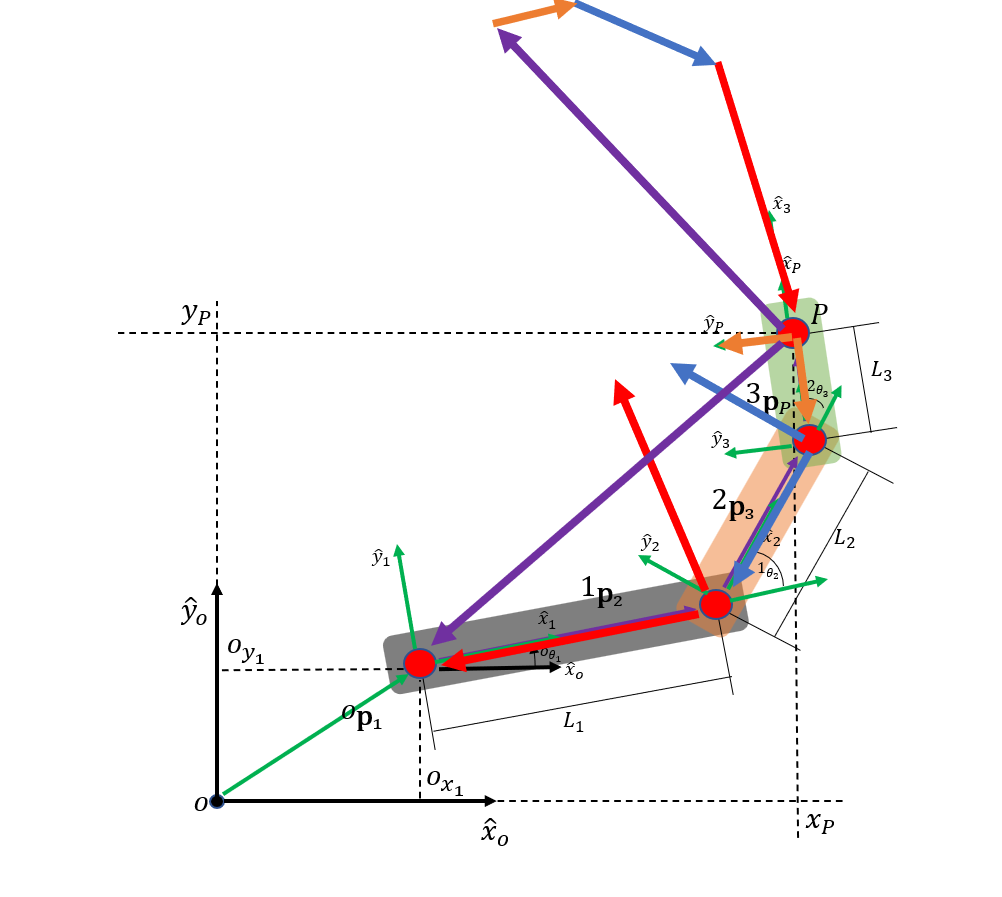

### Modelo cinemático inverso de las aceleraciones

Partiendo del modelo cinemático inverso de las velocidades, aplicamos derivada total a ambos miembros de la ecuación:


$$\frac{d}{dt}\dot{q} =\frac{d}{dt}\left({J_{\theta } }^{-1} (q)~^o {\dot{\xi} }_P \right)$$

&nbsp;&nbsp;&nbsp;&nbsp; Se aplica regla de la cadena en el miembro derecho


$$\frac{d}{dt}\left({J_{\theta } }^{-1} (q)~^o {\dot{\xi} }_P \right)=\frac{d}{dt}\left({J_{\theta } }^{-1} (q)\right)^o {\dot{\xi} }_P +{J_{\theta } }^{-1} \frac{d}{dt}\left(^o {\dot{\xi} }_P \right)=...$$

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Desarrollando  $\frac{d}{dt}{J_{\theta } }^{-1} (q)$ :


$$\frac{d}{dt}{J_{\theta } }^{-1} (q)=\ddot{q} =-J_{\theta }^{-1} (q){\dot{J} }_{\theta } (q,\dot{q} )J_{\theta }^{-1} (q)$$

Sustityuendo:


$$\ddot{q} =-J_{\theta }^{-1} (q){\dot{J} }_{\theta } (q,\dot{q} )J_{\theta }^{-1} (q)^o {\dot{\xi} }_P +J_{\theta }^{-1} (q)^o {\ddot{\xi} }_P$$

Simplificando con ${\dot{\xi} }_P =J_{\theta } (q)\dot{q}$ :


$$\ddot{q} =-J_{\theta }^{-1} (q){\dot{J} }_{\theta } (q,\dot{q} )\dot{q} +J_{\theta }^{-1} (q)^o {\ddot{\xi} }_P$$

### Modelo dinámico por ecuaciones de Eüler\-Lagrange

Se emplearan las siguientes ecuaciones para el cálculo de la energía cinética:

\matlabheadingtwo{
$$k_i =\frac{m_i }{2}v_{C_i }^T v_{C_i } +\frac{1}{2}{{\omega }}_{C_i }^T I_{C_i } {{\omega }}_{C_i }$$}

In [15]:
syms x_1_C1 theta_dot_O_1

v_C1_C1 = [0;x_1_C1*theta_dot_O_1;0]

v_O_C1 = [-x_1_C1*sin(theta_O_1)*theta_dot_O_1;x_1_C1*cos(theta_O_1)*theta_dot_O_1;0]
transpose(v_C1_C1)*v_C1_C1
simplify(transpose(v_O_C1)*v_O_C1)

## Cálculo de la posición de los centros de masa

Transformación ${}^{\mathrm{1}}{\mathbf{T}}_{\textrm{C1}}$


In [16]:
syms x_1_C1 x_2_C2 x_3_C3
%nota: x_1_C1  = x_1/2
%nota: x_2_C2  = x_2/2
%nota: x_3_C3  = x_3/2
T_1_C1 = Tij(x_1_C1,0,0,0,0,0)


Transformación ${}^0{\mathbf{T}}_{\textrm{C1}}$


In [17]:
T_O_C1 = T_O_1*T_1_C1



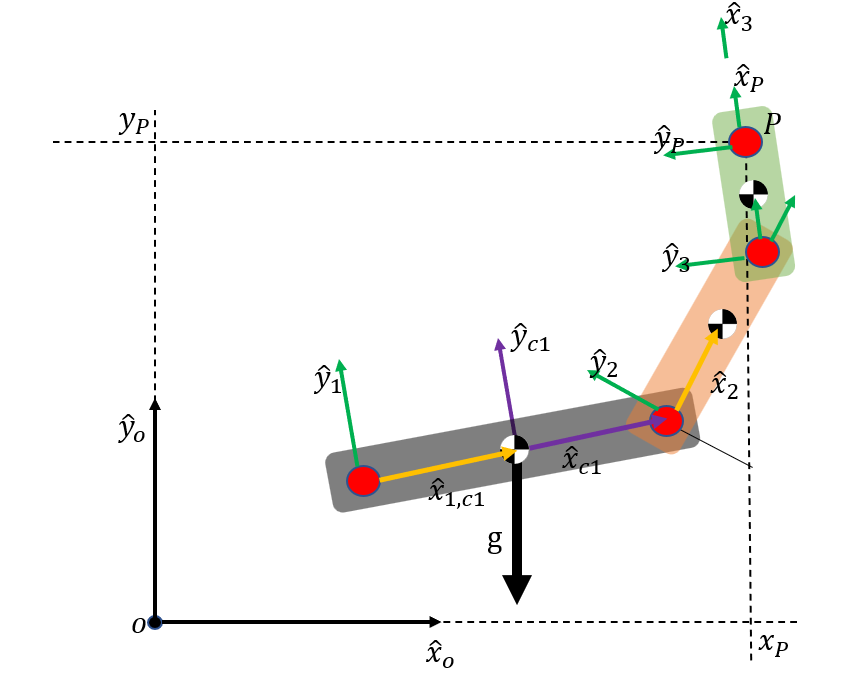


Transformación ${}^2{\mathbf{T}}_{\textrm{C2}}$


In [18]:
T_2_C2 = Tij(x_2_C2,0,0,0,0,0)


Transformación ${}^0{\mathbf{T}}_{\textrm{C2}}$


In [19]:
T_O_C2 = T_O_1*T_1_2*T_2_C2


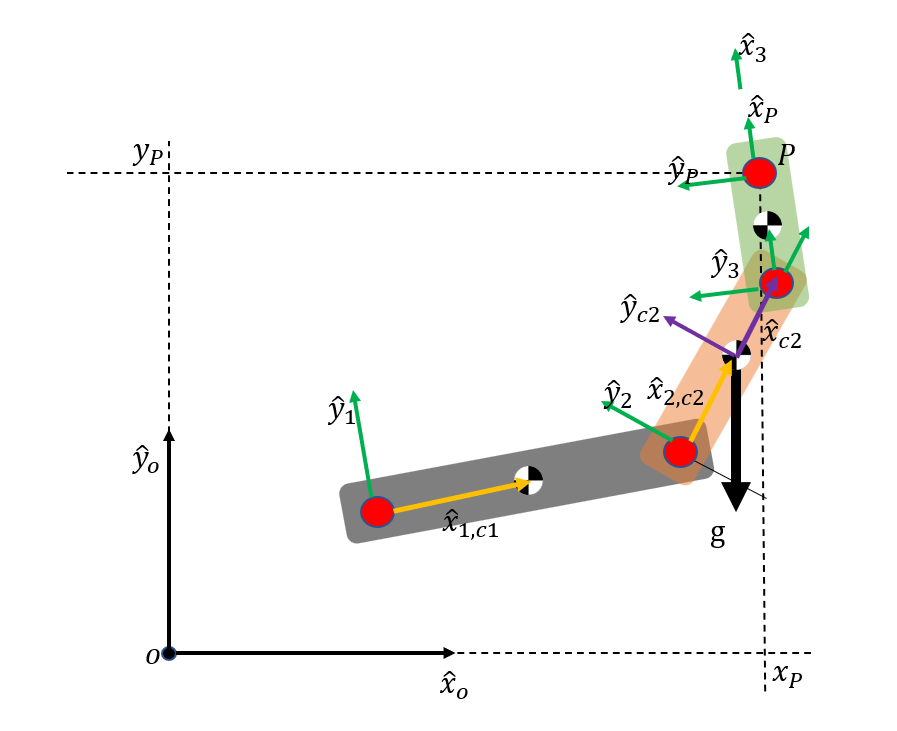


Transformación ${}^3{\mathbf{T}}_{\textrm{C3}}$


In [20]:
T_3_C3 = Tij(x_3_C3,0,0,0,0,0)


Transformación ${}^0{\mathbf{T}}_{\textrm{C3}}$


In [21]:
T_O_C3 = simplify(T_O_1*T_1_2*T_2_3*T_3_C3)



Por lo tanto, los vectores de posición de los centros de masa:


In [22]:
%Vectores de posición
p_O_C1 = [T_O_C1(1,4);T_O_C1(2,4);T_O_C1(3,4)]
p_O_C2 = simplify([T_O_C2(1,4);T_O_C2(2,4);T_O_C2(3,4)])

p_O_C3 = simplify([T_O_C3(1,4);T_O_C3(2,4);T_O_C3(3,4)])

## Cálculo de las velocidades

Cálculo de las velocidades lineales del sistema ${}^0{\mathbf{v}}_{\textrm{Ci}}=\frac{\mathrm{d}}{\textrm{dt}}{}^0{\mathbf{p}}_{\textrm{Ci}}=\frac{\mathrm{d}}{\mathrm{d}\theta_{O,1} }{}^0{\mathbf{p}}_{\textrm{Ci}}+\frac{\mathrm{d}}{\mathrm{d}\theta_{1,2} }{}^0{\mathbf{p}}_{\textrm{Ci}}+\frac{\mathrm{d}}{\mathrm{d}\theta_{2,3} }{}^0{\mathbf{p}}_{\textrm{Ci}}$ :


In [23]:
syms theta_dot_O_1 theta_dot_1_2 theta_dot_2_3

v_O_C1 = simplify(diff(p_O_C1,theta_O_1)*theta_dot_O_1+diff(p_O_C1,theta_1_2)*theta_dot_1_2+diff(p_O_C1,theta_2_3)*theta_dot_2_3)
v_O_C2 = simplify(diff(p_O_C2,theta_O_1)*theta_dot_O_1+diff(p_O_C2,theta_1_2)*theta_dot_1_2+diff(p_O_C2,theta_2_3)*theta_dot_2_3)
v_O_C3 = simplify(diff(p_O_C3,theta_O_1)*theta_dot_O_1+diff(p_O_C3,theta_1_2)*theta_dot_1_2+diff(p_O_C3,theta_2_3)*theta_dot_2_3)


Cálculo de la velocidades angulares del sistema


Utilizando la fórmula


$$^{i+1} \omega_{i+1} =^{i+1} R_i ^i \omega_i +^{i+1} {\hat{z} }_{i+1} {\dot{\theta} }_{i+1}$$

y considerando que


$${}^1{\mathbf{R}}_0={{}^0{\mathbf{R}}_1}^{-1} ={{}^0{\mathbf{R}}_1}^T$$

Propagación de velocidades angulares del primer cuerpo:


In [24]:
syms omega_1_1 omega_2_2 omega_3_3
%Propagación para el primer cuerpo
omega_1_1


Al no haber velocidad angular en el punto 0:


In [25]:
omega_O_O = [0;0;0]

omega_O_O = 3x1
     0
     0
     0


Eje de rotación


In [26]:
n_1_1 = [0;0;1]

n_1_1 = 3x1
     0
     0
     1

In [27]:
R_O_1 = [T_O_1(1,1),T_O_1(1,2),T_O_1(1,3);T_O_1(2,1),T_O_1(2,2),T_O_1(2,3);T_O_1(3,1),T_O_1(3,2),T_O_1(3,3)]

In [28]:
R_1_O = transpose(R_O_1)

In [29]:

%Ecuación de propagación
omega_1_1 = R_1_O*omega_O_O+n_1_1*theta_dot_O_1

## **Propagación de velocidades lineales entre el sistema {0} al sistema {1}**

Proponiendo:


$$^1 v_1 =^o R_1 (^o v_o +^o {{\omega }}_o \times ^o p_1 )$$

In [30]:
v_1_1 = R_1_O*([0;0;0]+cross([0;0;0],[x_O_1;y_O_1;0]))

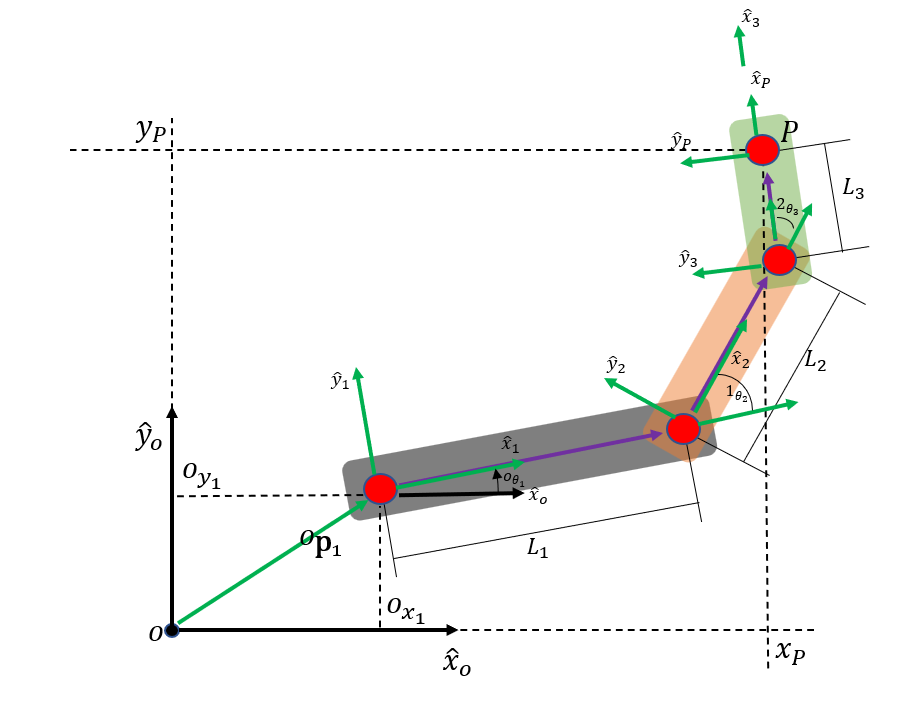

## **Propagación de velocidades angulares del segundo cuerpo:**

In [31]:
%Propagación para el segundo cuerpo
omega_2_2

In [32]:
n_2_2 = [0;0;1]

n_2_2 = 3x1
     0
     0
     1

In [33]:
R_1_2 = [T_1_2(1,1),T_1_2(1,2),T_1_2(1,3);T_1_2(2,1),T_1_2(2,2),T_1_2(2,3);T_1_2(3,1),T_1_2(3,2),T_1_2(3,3)]

In [34]:
R_2_1 = transpose(R_1_2)

In [35]:
%Ecuación de propagación
omega_2_2 = R_2_1*omega_1_1+n_2_2*theta_dot_1_2

## **Propagación de velocidades lineales entre el sistema {1} al sistema {2}**

Proponiendo:


$$^2 v_2 =^2 R_1 (^1 v_+ ^1 {{\omega }}_1 \times ^1 p_2 )$$

In [36]:
syms L1
v_2_2 = R_2_1*(v_1_1+cross(omega_1_1,[L1;0;0]))


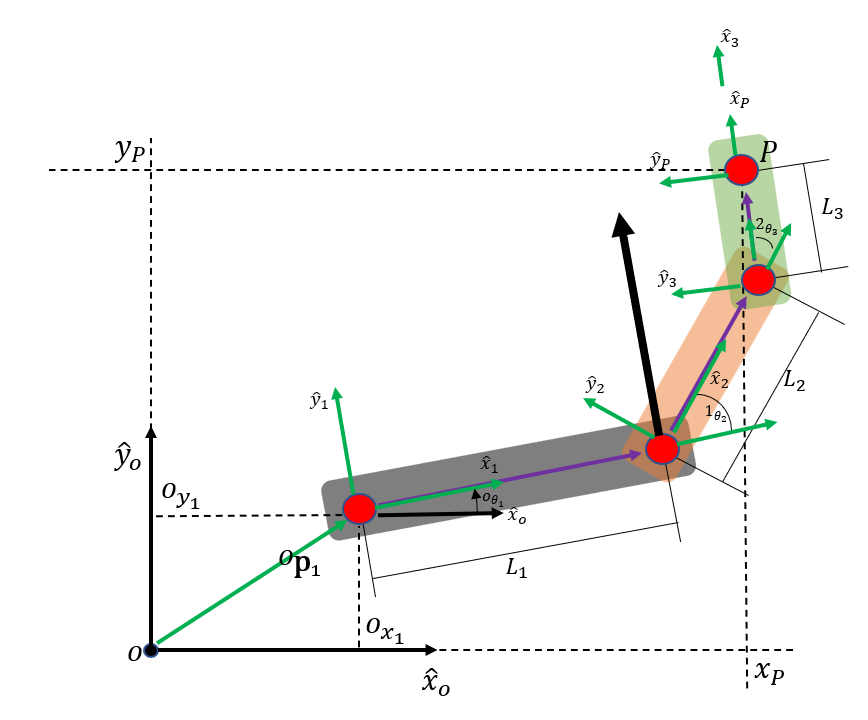


## **Propagación de velocidades angulares del tercer cuerpo:**

In [37]:
%Propagación para el tercer cuerpo
omega_3_3

In [38]:
n_3_3 = [0;0;1]

n_3_3 = 3x1
     0
     0
     1

In [39]:
R_2_3 = [T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)]

In [40]:
R_3_2 = transpose(R_2_3)

In [41]:

%Ecuación de propagación
omega_3_3 = R_3_2*omega_2_2+n_3_3*theta_dot_2_3

## **Propagación de velocidades lineales entre el sistema {2} al sistema {3}**

Proponiendo:


$$^3 v_3 =^3 R_2 (^2 v_2 +^2 {{\omega }}_2 \times ^2 p_3 )$$

In [42]:
syms L2
v_3_3 = R_3_2*(v_2_2+cross(omega_2_2,[L2;0;0]))


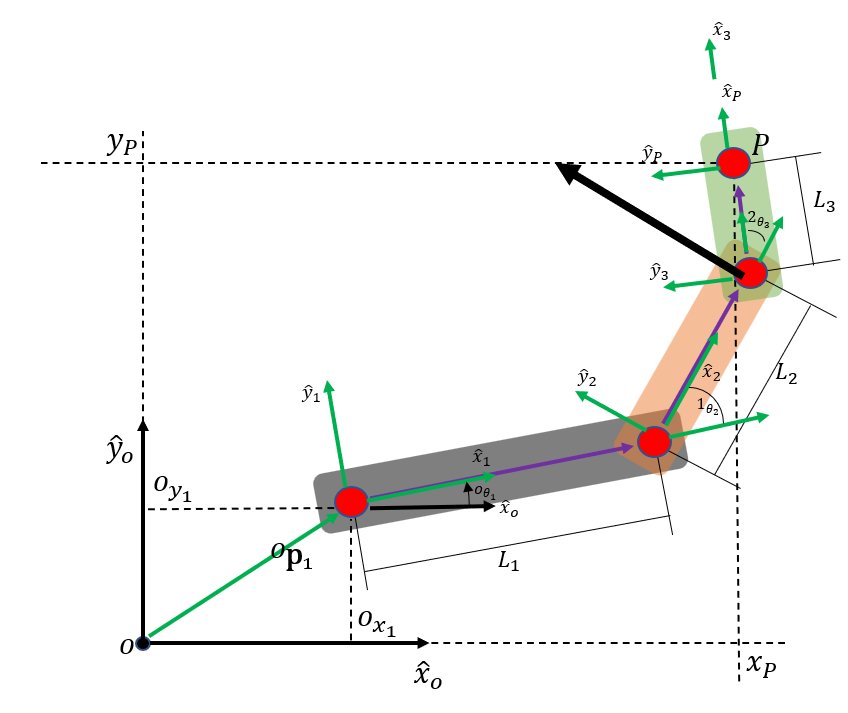

## **Propagación de velocidades angulares EN EL PUNTO P:**

In [43]:
%Propagación en el punto P

n_P_P = [0;0;1]

n_P_P = 3x1
     0
     0
     1

In [44]:
R_3_P = [T_2_3(1,1),T_2_3(1,2),T_2_3(1,3);T_2_3(2,1),T_2_3(2,2),T_2_3(2,3);T_2_3(3,1),T_2_3(3,2),T_2_3(3,3)]

In [45]:
R_P_3 = transpose(R_3_P)

In [46]:

%Ecuación de propagación
omega_P_P = R_P_3*omega_3_3+n_P_P*0

## **Propagación de velocidades lineales entre el sistema {3} al sistema {P}**

Proponiendo:


$$^P v_P =^P R_3 (^3 v_3 +^3 {{\omega }}_3 \times ^3 p_P )$$

In [47]:
syms L3
v_P_P = R_P_3*(v_3_3+cross(omega_3_3,[L3;0;0]))


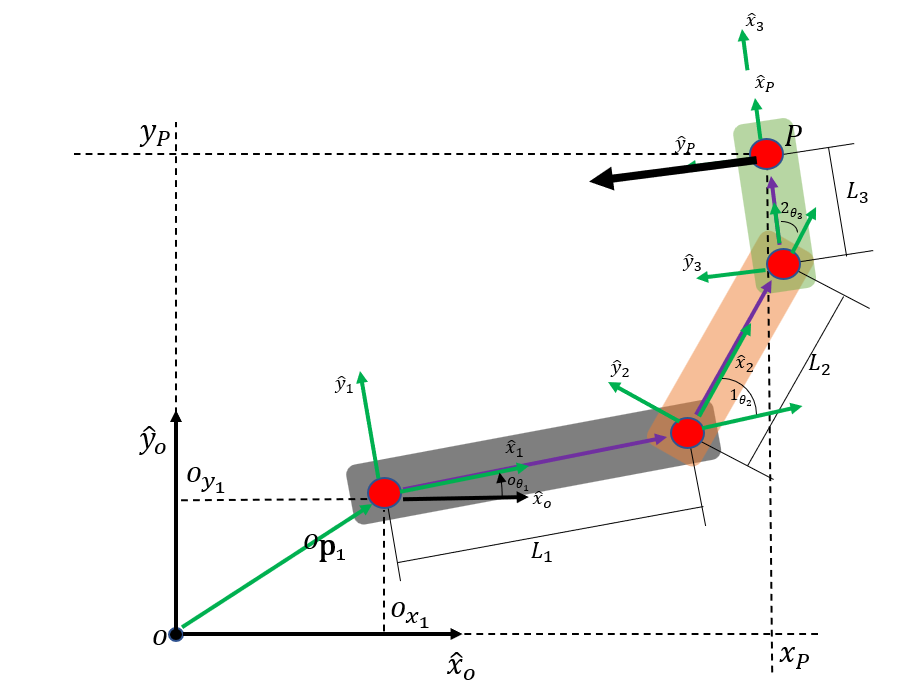

## **Propagación de velocidades lineales entre el sistema {P} al sistema {0}**

Proponemos:


$$^0 v_P =^o R_P ~^P v_P$$

Donde

-  $\displaystyle ^o R_P =^o R_1 ~^1 R_2 ~^2 R_3 ~^3 R_P$

In [48]:
R_O_P = R_O_1*R_1_2*R_2_3*R_3_P


Resolviendo $^0 v_P =^o R_P ~^P v_P$ :


In [49]:
v_O_P = R_O_P*v_P_P

## Defición de los elementos de inercia

Vector de gravedad en el eje en el que se aplica


In [50]:
syms g I_xx1 I_yy1 I_zz1 I_xx2 I_yy2 I_zz2 I_xx3 I_yy3 I_zz3
%vector de gravedad

g_v = [0;-g;0]


Matrices de inercia independientes de cada cuerpo:


In [51]:
I_C1 = [I_xx1,0,0;0,I_yy1,0;0,0,I_zz1]
I_C2 = [I_xx2,0,0;0,I_yy2,0;0,0,I_zz2]
I_C3 = [I_xx3,0,0;0,I_yy3,0;0,0,I_zz3]



**Cáculo del Lagrangeano**


La energía cinética es una constante que se calcula mediante la fórmula


$$k=\frac{1}{2}m_1 {\mathbf{v}}_{\textrm{C1}}^T {\mathbf{v}}_{\textrm{C1}} +\frac{1}{2}{{}^1{\omega }_1}^T {\mathrm{I}}_{\textrm{C1}} {}^1{\omega }_1$$

Energía cinética del primer cuerpo:


In [52]:
syms m_1 m_2 m_3
%energía cinética de cada uno de los cuerpos

k_1 = simplify((m_1/2)*transpose(v_O_C1)*v_O_C1+(1/2)*transpose(omega_1_1)*I_C1*omega_1_1)


Energía cinética del segundo cuerpo:


In [53]:
k_2 = simplify((m_2/2)*transpose(v_O_C2)*v_O_C2+(1/2)*transpose(omega_2_2)*I_C2*omega_2_2)


Energía cinética del tercer cuerpo:


In [54]:
k_3 = simplify((m_3/2)*transpose(v_O_C3)*v_O_C3+(1/2)*transpose(omega_3_3)*I_C3*omega_3_3)


También es necesaria la energía potencia que se obtiene mediante


$$u_1 =-m_1 {\mathbf{g}}^T {}^0{\mathbf{p}}_{\textrm{C1}}$$

Energía potencial del primer cuerpo:


In [55]:
% Cáclulo de la energía potencial de cada cuerpo

u_1 = -m_1*transpose(p_O_C1)*g_v


Energía potencial del segundo cuerpo:


In [56]:
u_2 = -m_2*transpose(p_O_C2)*g_v


Energía potencial del tercer cuerpo:


In [57]:
u_3 = -m_3*transpose(p_O_C3)*g_v



Cálculo del Lagrangeano


El Lagrangeano se define como


$$\Gamma =\left(k_1 +k_2 +k_3 \right)-\left(u_1 +u_2 +u_3 \right)$$

In [58]:
La = (k_1+k_2+k_3)-(u_1+u_2+u_3)

## Cálculo de los pares

La ecuación de par se define como


$$\tau_i =\frac{d}{\textrm{dt}}\left(\frac{\delta }{\delta {\dot{q} }_i }\Gamma \right)-\frac{\delta }{\delta q_i }\Gamma$$

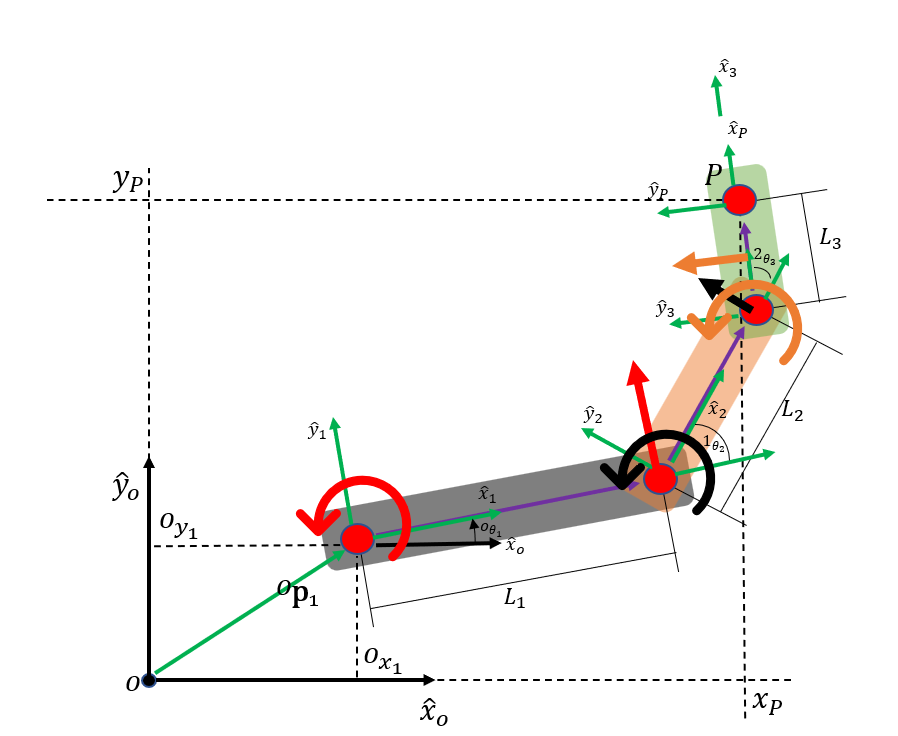


En la que se tiene que obtener la derivada parcial del Lagrangiano respecto a la velocidad de cada junta y posteriormente aplicar la regla de la cadena respecto a cada variable que resulte de la operación


Derivada parcial del Lagrangiano respecto a la velocidad del cuerpo 1:


In [59]:
syms theta_ddot_O_1 theta_ddot_1_2 theta_ddot_2_3

D_theta1 = diff(La,theta_dot_O_1)


Par del cuerpo 1 aplicando regla de la cadena y restando la derivada parcial respecto a theta:


In [60]:
% Cálculo de relación

tao_1 = diff(D_theta1,theta_O_1)*theta_dot_O_1 + diff(D_theta1,theta_1_2)*theta_dot_1_2 + diff(D_theta1,theta_2_3)*theta_dot_2_3 + diff(D_theta1,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta1,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta1,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_O_1)



Derivada parcial del Lagrangiano respecto a la velocidad del cuerpo 2:


In [61]:
D_theta2 = diff(La,theta_dot_1_2)


Par del cuerpo 2 aplicando regla de la cadena y restando la derivada parcial respecto a theta:


In [62]:
tao_2 = diff(D_theta2,theta_O_1)*theta_dot_O_1 + diff(D_theta2,theta_1_2)*theta_dot_1_2 + diff(D_theta2,theta_2_3)*theta_dot_2_3 + diff(D_theta2,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta2,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta2,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_1_2)



Derivada parcial del Lagrangiano respecto a la velocidad del cuerpo 3:


In [63]:
D_theta3 = diff(La,theta_dot_2_3)


Par del cuerpo 3 aplicando regla de la cadena y restando la derivada parcial respecto a theta:


In [64]:
tao_3 = diff(D_theta3,theta_O_1)*theta_dot_O_1 + diff(D_theta3,theta_1_2)*theta_dot_1_2 + diff(D_theta3,theta_2_3)*theta_dot_2_3 + diff(D_theta3,theta_dot_O_1)*theta_ddot_O_1+ diff(D_theta3,theta_dot_1_2)*theta_ddot_1_2+ diff(D_theta3,theta_dot_2_3)*theta_ddot_2_3-diff(La,theta_2_3)


Vector de par resultante. El par aplicando en cada junta


In [65]:
tao = [tao_1;tao_2;tao_3]


Matrices de incercia que experimenta cada junta debido a la aceleración


In [66]:
% Cálculo de la matriz de inercia

M1 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[1,0,0,0,0,0,0])
M2 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,1,0,0,0,0,0])
M3 = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,1,0,0,0,0])


Matriz de inercias debido al cambio en la velocidad de cada junta:


In [67]:
M_theta = collect([M1 M2 M3],[m_1,m_2,m_3])


Cálculo del vector de pares por efecto Coriolis. Par que experimenta cada junta debido a la velocidad


In [68]:
V_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,0])


Cálculo del vector de pares por efecto de la gravedad. Par que experimenta cada junta debido a la gravedad


In [69]:
G_theta = subs(tao,[theta_ddot_O_1,theta_ddot_1_2,theta_ddot_2_3,theta_dot_O_1,theta_dot_1_2,theta_dot_2_3,g],[0,0,0,0,0,0,g])


Obteniendo así el modelo Dinámico en el que:


$$\tau_{\theta } =\mathbf{M}\left(\theta \right)\ddot{\theta} +\mathbf{V}\left(\theta ,\dot{\theta} \right)+\mathbf{G}\left(\theta \right)$$
## Cálculo del modelo dinámico inverso

Para obtener el modelo dinámico inverso partimos de la siguiente ecuación


$$\ddot{\theta} =M^{-1} (\theta )\left(\tau -V(\theta ,\dot{\theta} )-G(\theta )\right)$$

Obtenemos la inversa de la matriz de inercia


In [70]:
M_inv = simplify(inv(M_theta))


Por último caculamos el modelo desdeado


In [71]:
theta_ddot =M_inv*(tao-V_theta-G_theta)
theta_ddot_s =simplify(M_inv*(tao-V_theta-G_theta))

#### Conclusiones

Se lograron obtener los diversos modelos matemáticos planteados al inicio. El razonamiento fue el adecuado y, sin duda alguna, el uso del software ayudó con la simplificación de las ecuaciones.


Se realizaron investigaciones para hallar la forma de obtener los modelos inversos de las ecuaciones. Al tratarse de operaciones con matrices, el despeje de estas presenta un comportamiento distinto al de los escalares, sumado al hecho de que las matrices pueden o no ser cuadradas.


Un ejemplo claro, utilizado en el examen, fue la obtención del modelo inverso de la postura del robot. Debido a que el modelo directo de postura no es una matriz cuadrada, se tuvo que utilizar la ecuación pseudoinversa de Moore\-Penrose para obtener el resultado deseado.


Otro punto clave para la adecuada obtención de resultados fue nombrar a las variables de forma clara y ordenada. El archivo contiene más de sesenta variables; por ello, fue necesario identificar con precisión qué representa cada una. Además, muchas de estas variables se reutilizaban en distintas ocasiones, lo cual facilitó la programación de las ecuaciones posteriores.


Si bien se trató de un modelo básico, en mi opinión fue una excelente manera de comenzar a interpretar los principios de movilidad de un robot genérico. Un análisis profundo fue necesario para aprender a leer las ecuaciones y, con base en ellas, llegar a un modelo final en cada sección.

